##Checkpoint realizado por Pedro Henrique Fernandes Lô de Barros - RM97937

###Script Principal

In [ ]:
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from scipy import stats

In [ ]:
# Carregando o dataset
data_frame = pd.read_csv("insurance.csv")

In [ ]:
# Fazendo o processamento das variáveis categóricas
label_encoder = LabelEncoder()

# Para cada coluna categórica, faz a devida transformação em dados numéricos usando o LabelEncoder.
for coluna in data_frame.select_dtypes(include='object').columns:
    if coluna != 'region':
        label_encoder.fit(data_frame[coluna])
        data_frame[coluna] = label_encoder.transform(data_frame[coluna])
    else:
        # O parâmetro sparce_output diz que a matriz, retornada pelo encoder, não é esparsa (versão não compacta).
        one_hot_encoder = OneHotEncoder(sparse_output=False)
        # É necessário fazer data_frame.loc[:, coluna:coluna] pois o enconder exibe uma matriz/data frame, ao invés de uma série.
        colunas_codificadas = one_hot_encoder.fit_transform(data_frame.loc[:, coluna:coluna])
        # O método get_featured_names_out, do one hot enconder, retorna os nomes das colunas resultantes do processo de fit.
        # Deve ser fornecido uma lista com os nomes das colunas.
        df_colunas_transformadas = pd.DataFrame(colunas_codificadas,
                                                columns=one_hot_encoder.get_feature_names_out([coluna]))
        df_codificado = pd.concat([data_frame, df_colunas_transformadas], axis=1)
        df_codificado.drop([coluna], axis=1, inplace=True)
        data_frame = df_codificado

###Item (1)

In [ ]:
# Construção do modelo para o item (1):

# Seleção das variáveis
var_preditoras_IT1 = data_frame.drop(['charges'], axis=1)
var_alvo = data_frame['charges']

# Separação dos dados de treinamento e teste
# Usando: 80% para treinameto e 20% para teste
x_train_IT1, x_test_IT1, y_train_IT1, y_test_IT1 = train_test_split(var_preditoras_IT1,
                                                    var_alvo,
                                                    test_size=0.2,
                                                    random_state=0)

In [ ]:
# Treinamento do modelo
modelo_reg_multi_IT1 = LinearRegression()
modelo_reg_multi_IT1.fit(x_train_IT1, y_train_IT1)

LinearRegression()

In [ ]:
# Avaliação do modelo
# Imprime os coeficientes do modelo
print(f"Intercepto: {modelo_reg_multi_IT1.intercept_}")
coeficientes = pd.DataFrame(modelo_reg_multi_IT1.coef_,
                            var_preditoras_IT1.columns,
                            columns=['Coeficiente'])
print(f"Colunas: {coeficientes}\n")

Intercepto: -12311.913605650456
Colunas:                    Coeficiente
age                 253.700500
sex                 -15.463728
bmi                 335.962814
children            436.910121
smoker            23605.017267
region_northeast    483.840068
region_northwest    223.707336
region_southeast   -429.438766
region_southwest   -278.108638



In [ ]:
# Mostra o coeficiente de determinação
# (o quanto o modelo se ajusta aos dados)
# Previsao = modelo_reg_multi.predict(var_preditoras)
previsao = modelo_reg_multi_IT1.predict(x_test_IT1)
# r_sq = modelo_reg_multi.score(var_alvo, var_preditoras)
r_sq_IT1 = metrics.r2_score(y_test_IT1, previsao)
print(f"Coeficiente de Determinação (R^2): {r_sq_IT1}")
# Cálculo do R^2 ajusado (penaliza variáveis não explicativas)
n_IT1 = len(y_test_IT1)
k_IT1 = x_test_IT1.shape[1]
adjusted_r_squared_IT1 = 1 - (1 - r_sq_IT1) * (n - 1) / (n_IT1 - k_IT1 - 1)
print(f"R^2 ajustado: {adjusted_r_squared_IT1}")

Coeficiente de Determinação (R^2): 0.7999876970680433
R^2 ajustado: 0.7930105237099517


In [ ]:
# Cálculo dos erros
y_predicao_IT1 = modelo_reg_multi_IT1.predict(x_test_IT1)
print('MAE:', metrics.mean_absolute_error(y_test_IT1, y_predicao_IT1))
print('MSE:', metrics.mean_squared_error(y_test_IT1, y_predicao_IT1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_IT1, y_predicao_IT1)))

MAE: 3933.272649405236
MSE: 31827950.229523845
RMSE: 5641.626558850191


###Item (2)

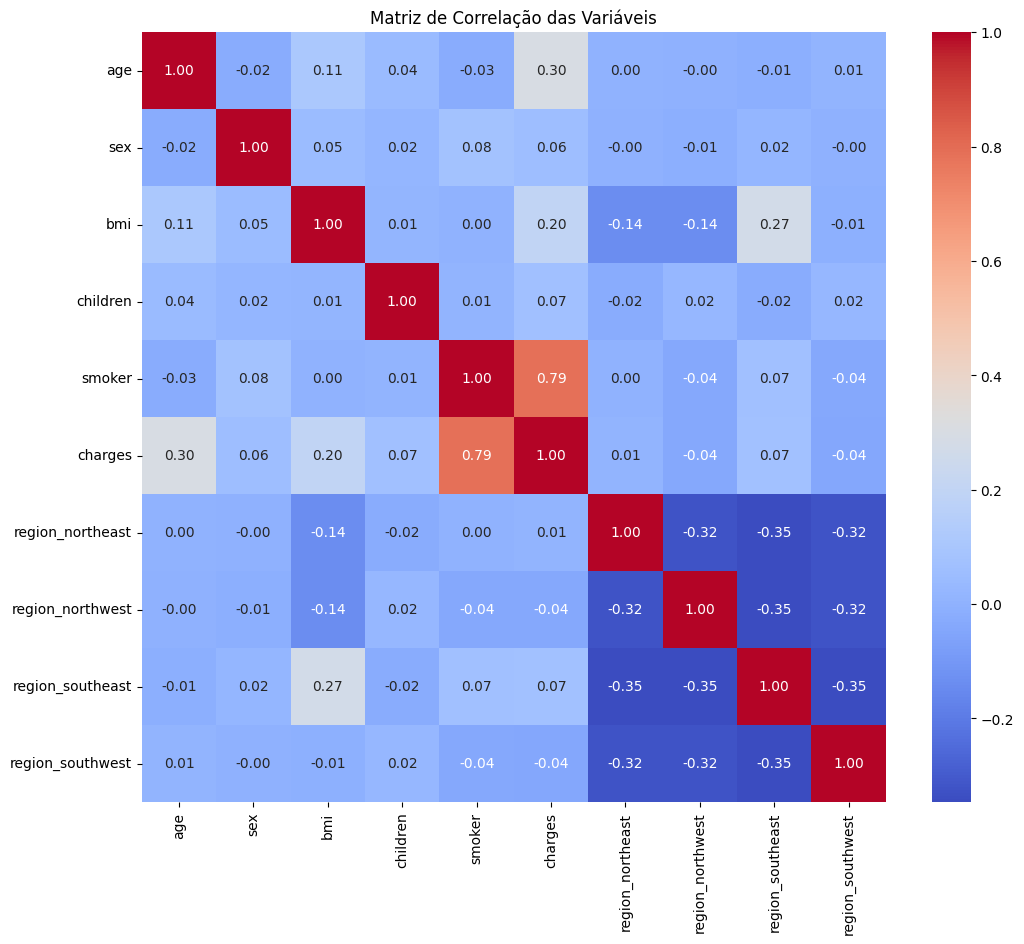

In [ ]:
#Tabela de correlação
correlation_matrix = data_frame.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis')
plt.show()

In [ ]:
# Cáculo dos p-valores para verificar quais variáveis podem

var_preditoras2 = sm.add_constant(data_frame.drop(['charges'], axis=1))
estimacao = sm.OLS(data_frame['charges'], var_preditoras2)
estimacao_pvalor = estimacao.fit()
print(estimacao_pvalor.pvalues)

const               1.477080e-35
age                 7.783217e-89
sex                 6.933475e-01
bmi                 6.498194e-31
children            5.769682e-04
smoker              0.000000e+00
region_northeast    1.084431e-08
region_northwest    1.471672e-11
region_southeast    3.177130e-14
region_southwest    5.483105e-16
dtype: float64


In [ ]:
# De acordo com a tabela de correlação e especialmente os p-valores, a variável mais adequada a ser removida é a variável sex.

In [ ]:
# Construção do modelo para o item (2):

# Seleção das variáveis
var_preditoras_IT2 = data_frame.drop(['charges', 'sex'], axis=1)
var_alvo = data_frame['charges']

# Separação dos dados de treinamento e teste
# Usando: 80% para treinameto e 20% para teste
x_train_IT2, x_test_IT2, y_train_IT2, y_test_IT2 = train_test_split(var_preditoras_IT2,
                                                    var_alvo,
                                                    test_size=0.2,
                                                    random_state=0)

In [ ]:
# Treinamento do modelo
modelo_reg_multi_IT2 = LinearRegression()
modelo_reg_multi_IT2.fit(x_train_IT2, y_train_IT2)

LinearRegression()

In [ ]:
# Avaliação do modelo
# Imprime os coeficientes do modelo
print(f"Intercepto: {modelo_reg_multi_IT1.intercept_}")
coeficientes = pd.DataFrame(modelo_reg_multi_IT1.coef_,
                            var_preditoras_IT1.columns,
                            columns=['Coeficiente'])
print(f"Colunas: {coeficientes}\n")

Intercepto: -12311.913605650456
Colunas:                    Coeficiente
age                 253.700500
sex                 -15.463728
bmi                 335.962814
children            436.910121
smoker            23605.017267
region_northeast    483.840068
region_northwest    223.707336
region_southeast   -429.438766
region_southwest   -278.108638



In [ ]:
# Mostra o coeficiente de determinação
# (o quanto o modelo se ajusta aos dados)
# Previsao = modelo_reg_multi.predict(var_preditoras)
previsao = modelo_reg_multi_IT2.predict(x_test_IT2)
# r_sq = modelo_reg_multi.score(var_alvo, var_preditoras)
r_sq_IT2 = metrics.r2_score(y_test_IT2, previsao)
print(f"Coeficiente de Determinação (R^2): {r_sq_IT2}")
# Cálculo do R^2 ajusado (penaliza variáveis não explicativas)
n_IT2 = len(y_test_IT2)
k_IT2 = x_test_IT2.shape[1]
adjusted_r_squared_IT2 = 1 - (1 - r_sq_IT2) * (n - 1) / (n_IT2 - k_IT2 - 1)
print(f"R^2 ajustado: {adjusted_r_squared_IT2}")

Coeficiente de Determinação (R^2): 0.7999608872686219
R^2 ajustado: 0.7937820729757608


In [ ]:
# Cálculo dos erros
y_predicao_IT2 = modelo_reg_multi_IT2.predict(x_test_IT2)
print('MAE:', metrics.mean_absolute_error(y_test_IT2, y_predicao_IT2))
print('MSE:', metrics.mean_squared_error(y_test_IT2, y_predicao_IT2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_IT2, y_predicao_IT2)))

MAE: 3934.0690535033696
MSE: 31832216.471895635
RMSE: 5642.0046501129045


###Breve análise dos resultados

In [ ]:
#Realizando um breve sumário das diferenças que ocorreram do modelo do item 1 para o do item 2, temos que:
# O valor MAE aumentou em  0,79;
#O valor MSE  aumentou em 4.266,25;
#O valor RMSE 0,38.

#Considerando os resultados a respeito do grau de erro de ambos os modelos gerados, pode-se concluir que
#a remoção da variável sex não causa um impacto significativo para a melhoria e precisão do modelo de predição.